## TNTR - Data Analysis <br> 
### This notebook covers the analysis done for Jan-2023 and is split broadly into 3 categories : <br>
    1. System Data View
        a. System Processing Volumes
        b. STP vs N-STP Transactions
    2. Operator Data View
        a. Users per application role
        b. Actions applied by users
        c. No. of actions taken by users in appliction
    3. Business Data View
        a. Volume distribution by regulation
        b. Volume distribution for Clearing House
        c. Volume distribution for top 10 Clients.
        d. Top 10 countries by daily avg vol reported
    

In [81]:
import numpy as np
import  pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import json
import plotly.express as px
import plotly.graph_objects as go
import plotly
from plotly.subplots import make_subplots
import babel.numbers
import geopandas as gpd
import country_converter as coco
from pycountry_convert import country_alpha2_to_country_name, country_name_to_country_alpha3

In [82]:
#df_1 = pd.read_json(r'\\rbsres01\shareddata\rassre\AIMLData\TNTR\TNTR_trade_prodprl.json\TNTR_trade_prodprl.json')

In [83]:
#df_11 = pd.json_normalize(df_1.id)

In [84]:
#df_12 = pd.json_normalize(df_1.lifetime)

In [85]:
#df_13 = pd.json_normalize(df_1.document)

In [86]:
#dff1 = pd.concat([df_11,df_12,df_13], axis=1)

In [87]:
df_2 = pd.read_json(r'\\rbsres01\shareddata\rassre\AIMLData\TNTR\TNTR_trade_prodprl_sample_data_k.json\TNTR_trade_prodprl_sample_data_k.json')

In [88]:
df_21 = pd.json_normalize(df_2.id)

In [89]:
df_22 = pd.json_normalize(df_2.lifetime)

In [90]:
df_23 = pd.json_normalize(df_2.document)

In [91]:
dff = pd.concat([df_21,df_22,df_23], axis=1)

In [92]:
#dff1.shape

In [93]:
dff.shape

(185535, 43)

In [94]:
pd.set_option('display.max_columns',37)
dff.head()                                                                      #FINAL DATAFRAME 

,key,version,from,to,subjectIdentifier.transactionId,subjectIdentifier.sourceSystem,subjectIdentifier.version,subjectIdentifier.regulatoryRegimeIdentifier.name,subjectIdentifier.regulatoryRegimeIdentifier.regulatoryAuthority,transactionReportingStatus.transactionStateValue,transactionReportingStatus.stateTransitionDateTime,transactionReportingStatus.stateTransitionEffectiveDateTime,transactionReportingStatus.commentary,reportableData.assetClass,reportableData.collateralizedFlag,reportableData.executionVenueMicCode,reportableData.leg1NotionalAmount,reportableData.leg1NotionalCurrency,...,nonReportableData.trResponseDateTime,nonReportableData.tntrReceivedTimestamp,nonReportableData.tradeParty2Name,nonReportableData.tradeParty1Name,nonReportableData.timelinessStatus,nonReportableData.isLatestVersion,nonReportableData.processTimeInReporting,nonReportableData.processTimeInResponse,nonReportableData.pdfFlag,nonReportableData.updatedByApplication,exceptionManagement.userComment,exceptionManagement.approvalStatus,exceptionManagement.assignedTo,exceptionManagement.approvedBy,exceptionManagement.lastActionUser,exceptionManagement.lastActionDate,exceptionManagement.lastAction,exceptionManagement.editedFields
0,ae755c516180b207,2,"2023-01-01T00:03:25,973+0000","292278994-08-17T07:12:55,807+0000",L221231A01F55,GlobalFX GBLO,1,European Markets Infrastructure Regulation,Financial Conduct Authority (UK),Acknowledged,2023-01-01T00:03:25.942Z,2023-01-01T00:03:25.942Z,Trade Submission,ForeignExchange,PARTIALLY,XOFF,488340.0,NOK,...,2023-01-01T00:03:09.000Z,2023-01-01T00:03:06.705Z,SCM LLC RE SHARADA FUND LLC,"NATWEST MKTS PLC, EDINBURGH HO",Reported on Time,True,852,214,False,Response Service,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ae755c516180b207,1,"2023-01-01T00:03:07,910+0000","2023-01-01T00:03:25,973+0000",L221231A01F55,GlobalFX GBLO,1,European Markets Infrastructure Regulation,Financial Conduct Authority (UK),Submitted,2023-01-01T00:03:07.547Z,2023-01-01T00:03:07.547Z,Trade Submission,ForeignExchange,PARTIALLY,XOFF,488340.0,NOK,...,NaN,2023-01-01T00:03:06.705Z,SCM LLC RE SHARADA FUND LLC,"NATWEST MKTS PLC, EDINBURGH HO",NaN,True,852,NaN,False,Reporting Engine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,c3d1b27fc1538721,2,"2023-01-01T00:03:26,179+0000","292278994-08-17T07:12:55,807+0000",L221231A01F54,GlobalFX GBLO,1,European Markets Infrastructure Regulation,Financial Conduct Authority (UK),Acknowledged,2023-01-01T00:03:26.022Z,2023-01-01T00:03:26.022Z,Trade Submission,ForeignExchange,PARTIALLY,XOFF,488340.0,NOK,...,2023-01-01T00:03:09.000Z,2023-01-01T00:03:08.830Z,SCM LLC RE SHARADA FUND LLC,"NATWEST MKTS PLC, EDINBURGH HO",Reported on Time,True,713,17,False,Response Service,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,c3d1b27fc1538721,1,"2023-01-01T00:03:09,877+0000","2023-01-01T00:03:26,179+0000",L221231A01F54,GlobalFX GBLO,1,European Markets Infrastructure Regulation,Financial Conduct Authority (UK),Submitted,2023-01-01T00:03:09.534Z,2023-01-01T00:03:09.534Z,Trade Submission,ForeignExchange,PARTIALLY,XOFF,488340.0,NOK,...,NaN,2023-01-01T00:03:08.830Z,SCM LLC RE SHARADA FUND LLC,"NATWEST MKTS PLC, EDINBURGH HO",NaN,True,713,NaN,False,Reporting Engine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,75e55ad0a144ff8a,2,"2023-01-01T00:03:26,010+0000","292278994-08-17T07:12:55,807+0000",L221231A01F48,GlobalFX GBLO,1,European Markets Infrastructure Regulation,Financial Conduct Authority (UK),Acknowledged,2023-01-01T00:03:25.944Z,2023-01-01T00:03:25.944Z,Trade Submission,ForeignExchange,PARTIALLY,XOFF,1000.0,SEK,...,2023-01-01T00:03:12.000Z,2023-01-01T00:03:10.911Z,SCM LLC RE SHARADA FUND LLC,"NATWEST MKTS PLC, EDINBURGH HO",Reported on Time,True,797,217,False,Response Service,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
dff["transactionReportingStatus.stateTransitionDateTime"].sort_values(ascending = False)

185534    2023-01-04T23:57:21.544Z
185533    2023-01-04T23:57:21.544Z
185531    2023-01-04T23:53:16.039Z
185519    2023-01-04T23:53:16.039Z
185527    2023-01-04T23:53:15.997Z
                    ...           
9         2023-01-01T00:03:16.106Z
7         2023-01-01T00:03:13.654Z
5         2023-01-01T00:03:11.697Z
3         2023-01-01T00:03:09.534Z
1         2023-01-01T00:03:07.547Z
Name: transactionReportingStatus.stateTransitionDateTime, Length: 185535, dtype: object

In [96]:
dff.reset_index(inplace = True)

In [97]:
df_usermap = pd.read_excel(r'\\rbsres01\shareddata\rassre\AIMLData\TNTR\Ignite-TnTR-Users.xlsx')
# df_usermap['NAME'] = df_usermap['NAME'].apply(lambda x: x.split('TnTR')[0])
#df_usermap.head()

In [98]:
def namemap(x):
    try:
        return x + '-' + list(df_usermap[df_usermap['USER_RACF_ID'].str.contains(x, case=False)]['Role_Name'])[0]
    except:
        return x
dff['exceptionManagement.lastActionUser'] = dff['exceptionManagement.lastActionUser'].apply(namemap)

In [99]:
# dff['exceptionManagement.lastActionUser'].value_counts()

In [100]:
# df_usermap['Count']=1   ## Graph moved down, do not uncomment
# df_usermap_c = df_usermap.groupby('NAME').agg({'Count':sum}).reset_index().sort_values(by='Count',ascending = False)
# labels = list(df_usermap_c['NAME'])
# values = list(df_usermap_c['Count'])
# hovertext = [list(df_usermap_c['NAME'])[i] + '<br>' + 'Count: ' + str(list(df_usermap_c['Count'])[i]) for i in range(0,len(labels))]
# # Use `hole` to create a donut-like pie chart
# fig = go.Figure(data=[go.Pie(labels=labels, values=values,hovertext=hovertext, hole=.3, hoverinfo="text")])


# fig.update_traces(marker = dict(colors = ['#CCE5FF', '#99CCFF', '#66B2FF','#3399FF', '#0080FF', '0080FF']),)

# # fig.add_annotation(
# #     x = 0,
# #     y = 1.1,
# #     text = "Actions Performed by Users in the one month period<br>Count of users: ",
# #     showarrow =False,
# #     font = dict(size=14, color='blue'),
# # )

# fig.update_layout(
#                  title='User Distribution By Roles',
#                  template="ggplot2",
        
#                  )
# plotly.offline.plot(fig, filename = 'User Distribution By Roles.html',auto_open=False)

# fig.update_layout(height=500,
#                  )

# fig.show()


In [101]:
dff_ft = dff

In [102]:
dff['exceptionManagement.lastActionUser'].fillna('NULL',inplace = True)

In [103]:
#dff['exceptionManagement.lastActionUser'].unique()

In [104]:
st= []
for i in range(0,dff.shape[0]):
    if dff['exceptionManagement.lastActionUser'][i]=='NULL':
        st.append('STP')
    else:
        st.append('NON_STP')


In [105]:
dff['STP_NON_STP'] = st

In [106]:
#dff.STP_NON_STP.value_counts()

In [107]:
#dff.loc[dff.groupby('subjectIdentifier.transactionId')['version'].idxmax()]['STP_NON_STP'].value_counts()

In [108]:
dff_c = dff

In [109]:
dff_cn = dff_c[dff_c.STP_NON_STP=='NON_STP']
dff_cs = dff_c[dff_c.STP_NON_STP=='STP']

In [110]:
dff_cs = dff_cs.loc[dff_cs.groupby('subjectIdentifier.transactionId')['version'].idxmax()]
dff_cn = dff_cn.loc[dff_cn.groupby('subjectIdentifier.transactionId')['version'].idxmax()]

In [111]:
dff_f = pd.concat([dff_cn,dff_cs],axis= 0)

In [112]:
#dff_f.shape

In [113]:
#dff_c = dff_c.loc[dff_c.groupby('subjectIdentifier.transactionId')['version'].idxmax()]

In [114]:
dff_colorbar = pd.DataFrame()
dff_colorbar = dff_colorbar.append(dff.STP_NON_STP.value_counts(),ignore_index = True)
dff_colorbar = dff_colorbar.append(dff_f.STP_NON_STP.value_counts(),ignore_index = True)
dff_colorbar = dff_colorbar.rename(index={0:'Transactions_All_Versions', 1:'Unique_Transactions'})

# dff_colorbar['STP']=dff_colorbar['STP'].divide(sum(list(dff_colorbar['STP'])))*100
# dff_colorbar['NON_STP']=dff_colorbar['NON_STP'].divide(sum(list(dff_colorbar['NON_STP'])))*100
dff_colorbar.loc['Transactions_All_Versions_percent'] = dff_colorbar.loc['Transactions_All_Versions'].divide(sum(list(dff_colorbar.loc['Transactions_All_Versions'])))*100
dff_colorbar.loc['Unique_Transactions_percent'] = dff_colorbar.loc['Unique_Transactions'].divide(sum(list(dff_colorbar.loc['Unique_Transactions'])))*100

In [115]:
#dff_colorbar

In [116]:
dff.STP_NON_STP.value_counts()

STP        173865
NON_STP     11670
Name: STP_NON_STP, dtype: int64

In [117]:
dff_f.STP_NON_STP.value_counts()

STP        30267
NON_STP     2956
Name: STP_NON_STP, dtype: int64

In [118]:

#dff['month'] = pd.to_datetime(dff['nonReportableData.tntrReceivedTimestamp'],dayfirst = True).dt.month_name()
dff['date'] = pd.to_datetime(dff['nonReportableData.tntrReceivedTimestamp'],dayfirst = True).dt.date
dff['day'] = pd.to_datetime(dff['nonReportableData.tntrReceivedTimestamp'],dayfirst = True).dt.day_name()

In [119]:
dff_vol = dff.query("day!='Saturday' and day!='Sunday'")

In [120]:
dff_f_vol = dff_f

In [121]:
dff_f_vol['date'] = pd.to_datetime(dff_f_vol['nonReportableData.tntrReceivedTimestamp'],dayfirst = True).dt.date
dff_f_vol['day'] = pd.to_datetime(dff_f_vol['nonReportableData.tntrReceivedTimestamp'],dayfirst = True).dt.day_name()

In [122]:
dff_f_vol = dff_f_vol.query("day!='Saturday' and day!='Sunday'")

### System Data View

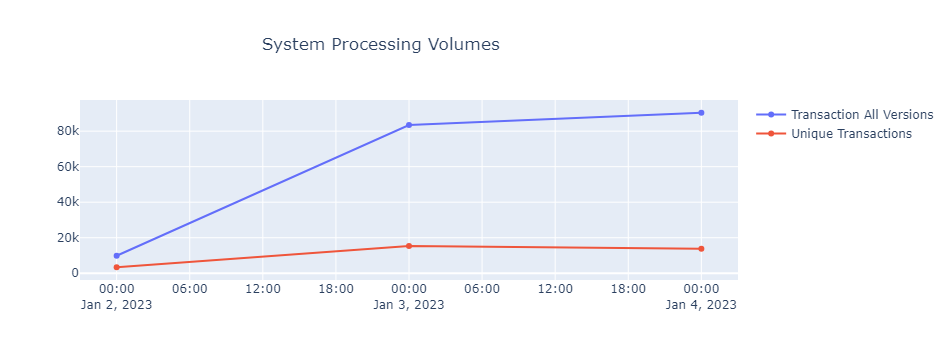

In [123]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=dff_vol.date.value_counts().index.sort_values(), y = dff_vol.date.value_counts().sort_index(),
                    mode='lines+markers',
                    name='Transaction All Versions'))
fig.add_trace(go.Scatter(x=dff_f_vol.date.value_counts().index.sort_values(), y = dff_f_vol.date.value_counts().sort_index(),
                    mode='lines+markers',
                    name='Unique Transactions'))
fig.update_layout(
    title="System Processing Volumes",title_x=0.4
)

fig.show()

In [124]:
# fig = go.Figure()

# trace1 = go.Pie(#histfunc="sum",
#     labels=["STP","NONSTP"], 
#     text = ["STP","NONSTP"],
    
#     values=list(dff_colorbar.loc['Transactions_All_Versions']),hovertext=['Count: ' + str(int(x)) for x in list(dff_colorbar.loc['Transactions_All_Versions'])], hole=.3, hoverinfo="text"
                      
#                      )


# fig.add_trace(trace1)
# fig.update_traces(marker = dict(colors = [ '#99CCFF', '0080FF']))

# # fig.add_annotation(
# #     x = 0,
# #     y = 1.1,
# #     text = "Actions Performed by Users in the one month period<br>Count of users: ",
# #     showarrow =False,
# #     font = dict(size=14, color='blue'),
# # )

# fig.update_layout(
#                  title='Transactions All Versions',
#                  template="ggplot2",
#                   showlegend=False
        
#                  )
# plotly.offline.plot(fig, filename = 'Transactions All Versions.html',auto_open=False)

# fig.update_layout(height=500,
#                  )

# fig.show()

In [125]:
# fig = go.Figure()

# trace1 = go.Pie(#histfunc="sum",
#     labels=["STP","NONSTP"], 
#     text = ["STP","NONSTP"],
    
#     values=list(dff_colorbar.loc['Unique_Transactions']),hovertext=['Count: ' + str(int(x)) for x in list(dff_colorbar.loc['Unique_Transactions'])], hole=.3, hoverinfo="text"
#                      )


# fig.add_trace(trace1)
# fig.update_traces(marker = dict(colors = ['#99CCFF',  '0080FF']))

# # fig.add_annotation(
# #     x = 0,
# #     y = 1.1,
# #     text = "Actions Performed by Users in the one month period<br>Count of users: ",
# #     showarrow =False,
# #     font = dict(size=14, color='blue'),
# # )

# fig.update_layout(
#                  title='Unique Transactions',
#                  template="ggplot2",
#                   showlegend=False
        
#                  )
# plotly.offline.plot(fig, filename = 'Unique Transactions.html',auto_open=False)

# fig.update_layout(height=500,
#                  )

# fig.show()

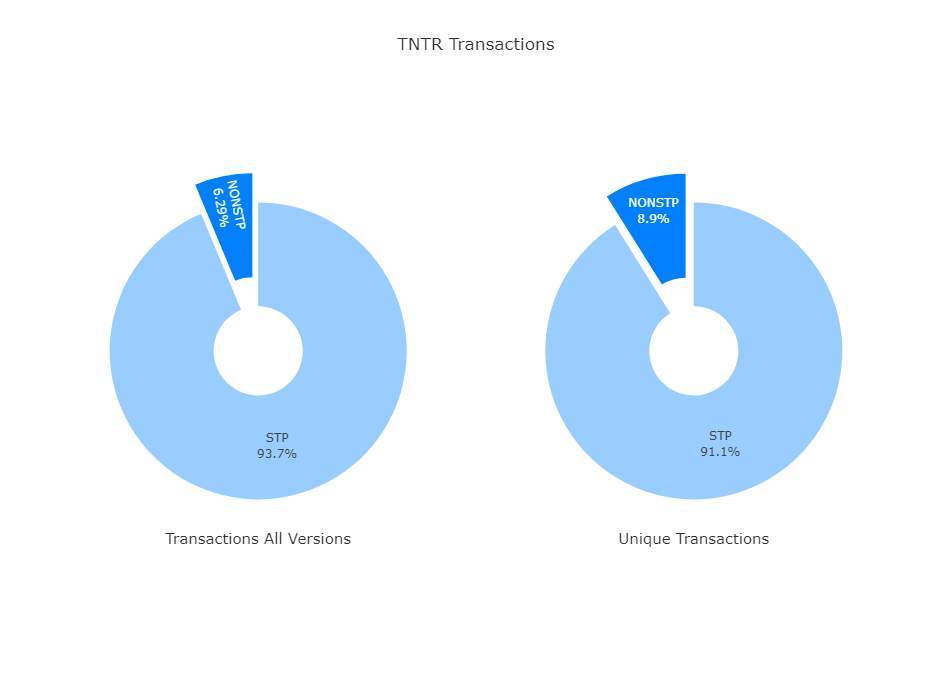

In [126]:
# fig = make_subplots(rows=1, cols=2)
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(
    go.Pie(
    labels=["STP","NONSTP"], 
    text = ["STP","NONSTP"],
    pull=[0,0.2],
    values=list(dff_colorbar.loc['Transactions_All_Versions']),
    hovertext=['Count: ' + str(int(x)) for x in list(dff_colorbar.loc['Transactions_All_Versions'])], 
    hole=.3, 
    hoverinfo="text",
    title='Transactions All Versions',
    titlefont=dict(size=15),
    titleposition="bottom center"),
    row=1, col=1
)

fig.add_trace(
    go.Pie(#histfunc="sum",
    labels=["STP","NONSTP"], 
    text = ["STP","NONSTP"],
    pull=[0,0.2],
    values=list(dff_colorbar.loc['Unique_Transactions']),
    hovertext=['Count: ' + str(int(x)) for x in list(dff_colorbar.loc['Unique_Transactions'])], 
    hole=.3, 
    hoverinfo="text",
    title='Unique Transactions',
    titlefont=dict(size=15),
    titleposition="bottom center"
    ),
    row=1, col=2
)
fig.update_traces(marker = dict(colors = ['#99CCFF',  '0080FF']))

fig.update_layout(template="ggplot2", title_text="TNTR Transactions",showlegend=False)
plotly.offline.plot(fig, filename = 'TNTR Transactions.html',auto_open=False)

fig.update_layout(height=700,
                 )
fig.show()

### Operator Data View

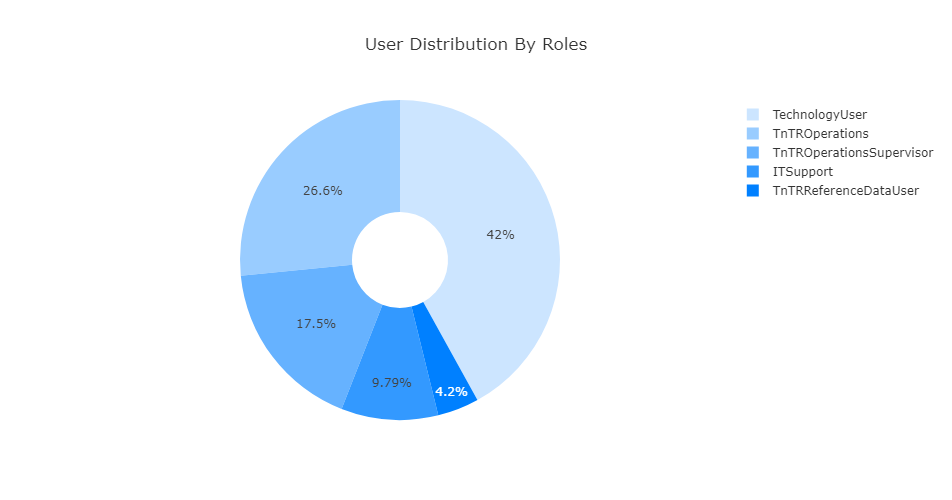

In [127]:
df_usermap['Count']=1
df_usermap_c = df_usermap.groupby('NAME').agg({'Count':sum}).reset_index().sort_values(by='Count',ascending = False)
labels = list(df_usermap_c['NAME'])
values = list(df_usermap_c['Count'])
hovertext = [list(df_usermap_c['NAME'])[i] + '<br>' + 'Count: ' + str(list(df_usermap_c['Count'])[i]) for i in range(0,len(labels))]
# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values,hovertext=hovertext, hole=.3, hoverinfo="text")])


fig.update_traces(marker = dict(colors = ['#CCE5FF', '#99CCFF', '#66B2FF','#3399FF', '#0080FF', '0080FF']),)

# fig.add_annotation(
#     x = 0,
#     y = 1.1,
#     text = "Actions Performed by Users in the one month period<br>Count of users: ",
#     showarrow =False,
#     font = dict(size=14, color='blue'),
# )

fig.update_layout(
                 title='User Distribution By Roles',
                 template="ggplot2",
        
                 )
plotly.offline.plot(fig, filename = 'User Distribution By Roles.html',auto_open=False)

fig.update_layout(height=500,
                 )

fig.show()


In [128]:
dff_cn = dff_c[dff_c.STP_NON_STP=='NON_STP']

In [129]:
dff_cn = dff_cn.loc[dff_cn.groupby('subjectIdentifier.transactionId')['version'].idxmax()]

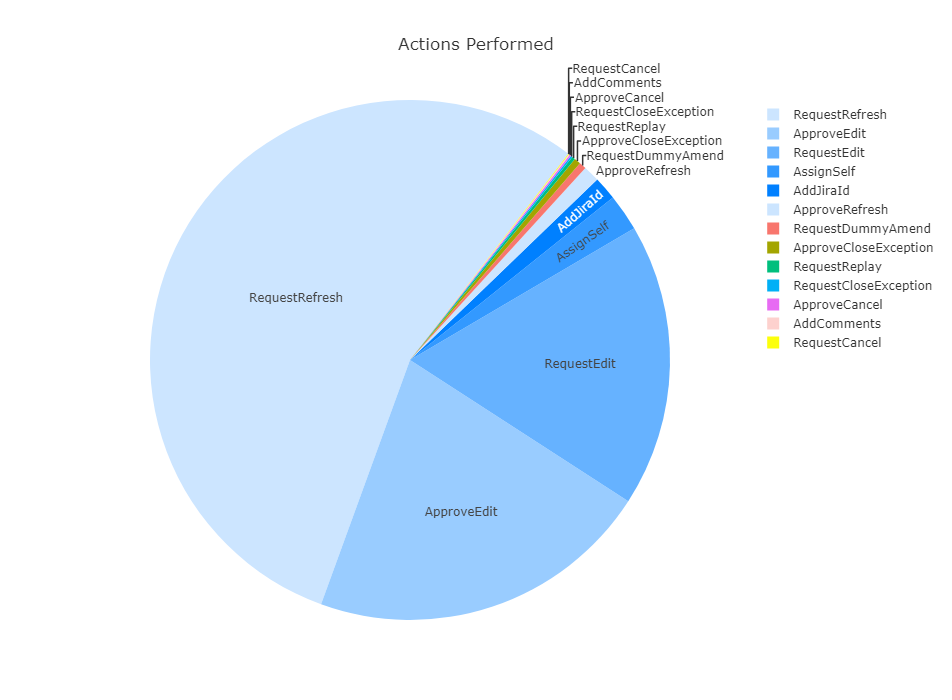

In [130]:
labels = list(''.join(x.split('Tntr')) for x in dff_cn['exceptionManagement.lastAction'].value_counts().index)
values = list(dff_cn['exceptionManagement.lastAction'].value_counts().values)
hovertext = [str(x) + ' (' + str(round(x / sum(values) * 100,2)) + '%)' for x in values]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, text = labels,
                             hovertext=hovertext, 
                             textinfo="text",
                             hoverinfo="text")])


# fig.update_traces(marker = dict(colors = ['#ff9999', '#E5CCFF', '#GCFFCC','#D6DBDF', '#FFCCCC']),rotation=200)
fig.update_traces(marker = dict(colors = ['#CCE5FF', '#99CCFF', '#66B2FF','#3399FF', '#0080FF', '#CCE5FF',]),rotation=200)

# fig.add_annotation(
#     x = -0.2,
#     y = 1.1,
#     text = "Actions Performed by Users in the one month period<br>Count of users: ",
#     showarrow =False,
#     font = dict(size=14, color='blue'),
# )

fig.update_layout(title='Actions Performed',
                 template="ggplot2",
                # uniformtext_minsize=13, uniformtext_mode='hide'
                 )
plotly.offline.plot(fig, filename = 'Actions Performed.html',auto_open=False)

fig.update_layout(height=700,
                 )
fig.show()

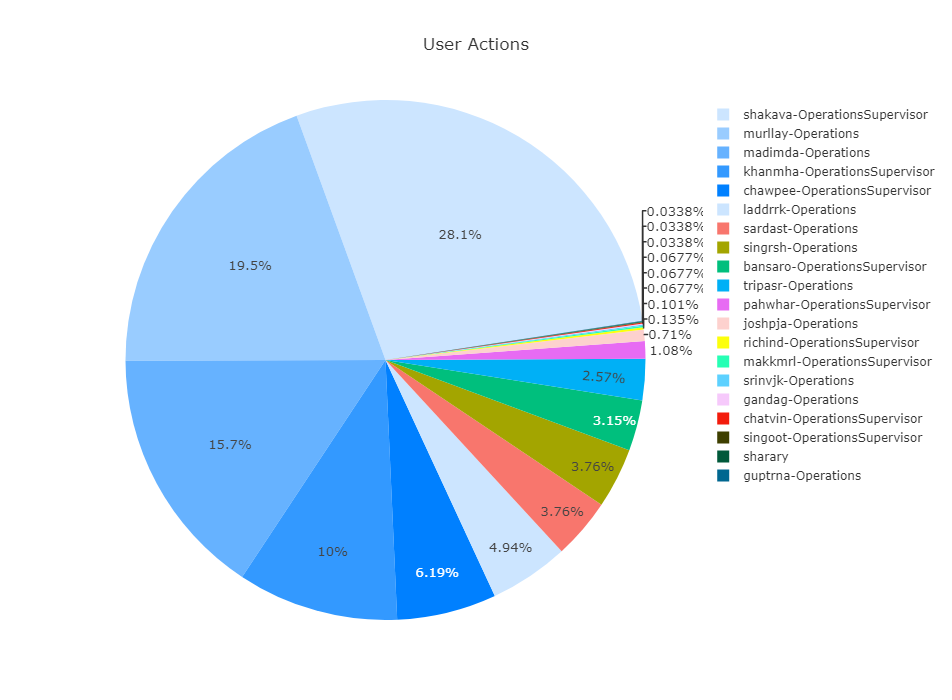

In [131]:
labels = list(dff_cn['exceptionManagement.lastActionUser'].value_counts().index)
values = list(dff_cn['exceptionManagement.lastActionUser'].value_counts().values)
hovertext = ['User: ' + labels[x] + '<br>' + str(values[x]) + ' (' + str(round(values[x] / sum(values) * 100,2)) + '%)' for x in range(0,len(values))]
fig = go.Figure(data=[go.Pie(labels=labels, values=values,# text = labels,
                             hovertext=hovertext, 
                             # textinfo="text",
                             hoverinfo="text")])


# fig.update_traces(marker = dict(colors = ['#ff9999', '#E5CCFF', '#GCFFCC','#D6DBDF', '#FFCCCC']),rotation=-20)
fig.update_traces(marker = dict(colors = ['#CCE5FF', '#99CCFF', '#66B2FF','#3399FF', '#0080FF', '#CCE5FF',]),rotation=-20)


# fig.add_annotation(
#     x = -0.2,
#     y = 1.1,
#     text = "Actions Performed by Users in the one month period<br>Count of users: ",
#     showarrow =False,
#     font = dict(size=14, color='blue'),
# )

fig.update_layout(
                 title='User Actions',
                 template="ggplot2",
                uniformtext_minsize=13, uniformtext_mode='hide'
                 )

plotly.offline.plot(fig, filename = 'User Actions.html',auto_open=False)

fig.update_layout(height=700,
                 )

fig.show()

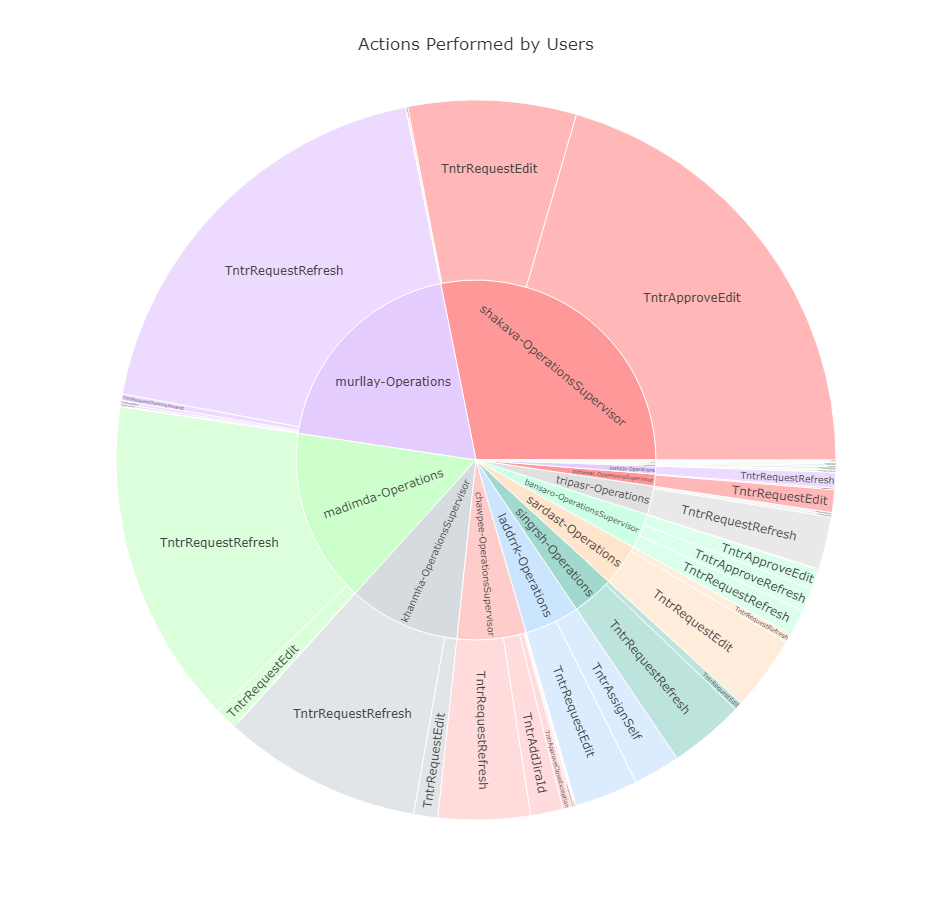

In [132]:
dff_cn2=dff_cn
dff_cn2['Count']=1
df_temp1 = dff_cn2.groupby(['exceptionManagement.lastActionUser','exceptionManagement.lastAction']).agg({'Count':'sum'}).sort_values(by='Count',ascending=False).reset_index()

label = []
parent = []
value = []
text = []
hoverinfo = []
color = []
color_pallete = ['#ff9999', '#E5CCFF', '#CCFFCC','#D6DBDF', '#FFCCCC', '#A2D9CE', '#FFE5CC', '#CCE5FF', '#E0E0E0', '#CCFFE5']
# color_pallete = ['#CCE5FF', '#99CCFF', '#66B2FF','#3399FF', '#0080FF', '#CCE5FF',]
color_dict = {}

for i in range(0,len(list(df_temp1['exceptionManagement.lastActionUser'].unique()))):
    color_dict[list(df_temp1['exceptionManagement.lastActionUser'].unique())[i]] = color_pallete[i%len(color_pallete)]

totsum =  sum(df_temp1['Count'])
for i in list(df_temp1['exceptionManagement.lastActionUser'].unique()):
    label.append(i)
    parent.append('')
    color.append(color_dict[i])
    val = sum(df_temp1[df_temp1['exceptionManagement.lastActionUser']==i]['Count'])
    # text.append(str(round(((val/totsum) * 100),1)) + '%')
    text.append(i)# + '<br>' + str(round(((val/totsum) * 100),1)) + '%')
    value.append(val/totsum)
    hoverinfo.append('User: ' + i + '<br>' + 'Count: ' + str(int(val)) + ' (' + str(round(((val/totsum) * 100),1)) + '%'')')

for i in list(df_temp1['exceptionManagement.lastActionUser'].unique()):
    for j in list(df_temp1[df_temp1['exceptionManagement.lastActionUser']==i]['exceptionManagement.lastAction'].unique()):
        label.append(i + '/' + j)
        parent.append(i)
        val = sum(df_temp1[(df_temp1['exceptionManagement.lastActionUser']==i) & (df_temp1['exceptionManagement.lastAction']==j)]['Count'])
        text.append(j)
        value.append(val/totsum)
        color.append(color_dict[i])
        hoverinfo.append('User: ' + i + '<br>' + 
                         'Action: ' + j + '<br>' + 
                         # 'Percent: '+ str(round(( * 100),1)) + '%' + '<br>' + 
                         'Count: ' + str(int(val))#  + ' (' + str(round(int(val) / sum(df_temp1[df_temp1['exceptionManagement.lastActionUser']==i]['Count']) * 100,2)) + '%'')'
                        )

trace1 = go.Sunburst(
        text= text,
        labels = label,
        parents=parent,
        values = value,
        hovertext=hoverinfo,
        marker = dict(colors = color),
        # marker = dict(colors = ['#ff9999', '#E5CCFF', '#CCFFCC','#D6DBDF', '#FFCCCC']),
        hoverinfo="text",
        textinfo="text",
        branchvalues='total',
    )

fig = go.Figure(data = [trace1])

# fig.add_annotation(
#     x = 0,
#     y = -0.1,
#     text = "Actions Performed by Users in the one month period<br>Count of users: ",
#     showarrow =False,
#     font = dict(size=14, color='blue'),
# )

fig.update_layout(
    title='Actions Performed by Users',
    # height = 700,
    template="ggplot2",
)
plotly.offline.plot(fig, filename = 'Actions Performed by Users Sunburst.html',auto_open=False)

# fig.add_annotation(
#     x = -0.09,
# )
fig.update_layout( height = 900,
)
fig.show()


In [133]:
# df_temp2 = df_temp1

# label = []
# parent = []
# value = []
# text = []
# hoverinfo = []
# color = []
# # color_pallete = ['#ff9999', '#E5CCFF', '#CCFFCC','#D6DBDF', '#FFCCCC', '#A2D9CE', '#FFE5CC', '#CCE5FF', '#E0E0E0', '#CCFFE5']
# color_pallete = ['#E5CCFF', '#CC99FF', '#B266FF','#9933FF', '#7F00FF', '#6600CC','#4C0099']

# color_dict = {}

# for i in range(0,len(list(df_temp2['exceptionManagement.lastActionUser'].unique()))):
#     color_dict[list(df_temp2['exceptionManagement.lastActionUser'].unique())[i]] = color_pallete[i%len(color_pallete)]

# totsum =  sum(df_temp2['Count'])
# for i in list(df_temp2['exceptionManagement.lastActionUser'].unique()):
#     val = val = sum(df_temp2[df_temp2['exceptionManagement.lastActionUser']==i]['Count'])
#     label.append(i + ' - ' + str(int(val)))
#     parent.append('')
#     color.append(color_dict[i])
#     # text.append(str(round(((val/totsum) * 100),1)) + '%')
#     text.append(i + ' - ' + str(int(val)))
#     value.append(val/totsum)
#     hoverinfo.append(i + ' - ' + str(int(val)))
#     # hoverinfo.append('User: ' + i + '<br>' + 'Count: ' + str(int(val)) + ' (' + str(round(((val/totsum) * 100),1)) + '%'')')

# for i in list(df_temp2['exceptionManagement.lastActionUser'].unique()):
#     for j in list(df_temp2[df_temp2['exceptionManagement.lastActionUser']==i]['exceptionManagement.lastAction'].unique()):
#         label.append(i + '/' + j)
#         parent.append(i + ' - ' + str(int(sum(df_temp2[df_temp2['exceptionManagement.lastActionUser']==i]['Count']))))
#         val = sum(df_temp2[(df_temp2['exceptionManagement.lastActionUser']==i) & (df_temp2['exceptionManagement.lastAction']==j)]['Count'])
#         text.append(j + ' - ' + str(int(val)))# + ' ' + str(int(sum(df_temp2[df_temp2['exceptionManagement.lastActionUser']==i]['Count']))))
#         value.append(val/totsum)
#         color.append(color_dict[i])
#         hoverinfo.append(j + ' - ' + str(int(val)))
        
#         # hoverinfo.append('User: ' + i + '<br>' + 
#         #                  'Action: ' + j + '<br>' + 
#         #                  # 'Percent: '+ str(round(( * 100),1)) + '%' + '<br>' + 
#         #                  'Count: ' + str(int(val))#  + ' (' + str(round(int(val) / sum(df_temp2[df_temp2['exceptionManagement.lastActionUser']==i]['Count']) * 100,2)) + '%'')'
#         #                 )

# trace1 = go.Treemap(
#         text= text,
#         labels = label,
#         parents=parent,
#         values = value,
#         hovertext=hoverinfo,
#         marker = dict(colors = color),
#         # marker = dict(colors = ['red','yellow','green','blue','light blue','orange','purple','pink','grey','black']),
#         hoverinfo="text",
#         textinfo="text",
#         branchvalues='total',
#     )

# fig = go.Figure(data = [trace1])

# # fig.add_annotation(
# #     x = 0,
# #     y = 1.1,
# #     text = "Actions Performed by Users in the one month period<br>Count of users: " + str(len(list(df_temp2['exceptionManagement.lastActionUser'].unique()))) + '<br>',
# #     showarrow =False,
# #     font = dict(size=14, color='blue'),
# # )

# fig.update_layout(
#     title='Actions Performed by Users',
#     template="ggplot2",
#     # showlegend=True,
# )

# plotly.offline.plot(fig, filename = 'Actions Performed by Users TreeMap.html',auto_open=False)

# fig.update_layout(height = 700,
# )

# fig.show()

In [134]:
#df_temp1

In [135]:
def makesunburst(df,heading,filename,flg):
    # sumtotal = sum(df['Count'])
    label = []
    parent = []
    value = []
    text = []
    hoverinfo = []
    color = []
    # color_pallete = ['#ff9999', '#E5CCFF', '#CCFFCC','#D6DBDF', '#FFCCCC', '#A2D9CE', '#FFE5CC', '#CCE5FF', '#E0E0E0', '#CCFFE5']
    if(flg):
        color_pallete = ['#E5CCFF', '#CC99FF', '#B266FF','#9933FF', '#7F00FF', '#6600CC','#4C0099']
    else:
        color_pallete = ['#ff9999', '#E5CCFF', '#CCFFCC','#D6DBDF', '#FFCCCC', '#A2D9CE', '#FFE5CC', '#CCE5FF', '#E0E0E0', '#CCFFE5']
        
        # color_pallete = ['#CCE5FF', '#99CCFF', '#66B2FF','#3399FF', '#0080FF', '#CCE5FF',]
    color_dict = {}

    for i in range(0,len(list(df['nonReportableData.tradeParty2Name'].unique()))):
        color_dict[list(df['nonReportableData.tradeParty2Name'].unique())[i]] = color_pallete[i%(len(color_pallete))]
    
    for i in list(df['nonReportableData.tradeParty2Name'].unique()):
        label.append(i)
        text.append(i)
        parent.append('')
        val = sum(df[df['nonReportableData.tradeParty2Name']==i]['Count'])
        value.append(val)
        color.append(color_dict[i])
        hoverinfo.append('CounterParty: ' + i + '<br>' + 'Count: ' + str(val))

    for i in list(df['nonReportableData.tradeParty2Name'].unique()):
        for j in list(df[df['nonReportableData.tradeParty2Name']==i]['reportableData.assetClass'].unique()):
            label.append(i + '/' + j)
            text.append(j)
            parent.append(i)
            color.append(color_dict[i])
            val = sum(df[(df['nonReportableData.tradeParty2Name']==i) & (df['reportableData.assetClass']==j)]['Count'])
            value.append(val)
            hoverinfo.append('CounterParty: ' + i + '<br>' + 
                             'Asset Class: ' + j + '<br>' +
                             'Count: ' + str(val))

    for i in list(df['nonReportableData.tradeParty2Name'].unique()):
        for j in list(df[df['nonReportableData.tradeParty2Name']==i]['reportableData.assetClass'].unique()):
            for k in list(df[(df['reportableData.assetClass']==j) & (df['nonReportableData.tradeParty2Name']==i)]['reportableData.productId'].unique()):
                label.append(i + '/' + j + '/' + k)
                text.append(k.replace(j+':',''))
                color.append(color_dict[i])
                parent.append(i + '/' + j)
                val = sum(df[(df['reportableData.assetClass']==j) & (df['nonReportableData.tradeParty2Name']==i) & (df['reportableData.productId']==k)]['Count'])
                value.append(val)
                hoverinfo.append('CounterParty: ' + i + '<br>' + 
                                 'Asset Class: ' + j + '<br>' +
                                 'reportableData.productId: ' + k.replace(j+':','') + '<br>' +
                                 'Count: ' + str(val))

    for i in list(df['nonReportableData.tradeParty2Name'].unique()):
        for j in list(df[df['nonReportableData.tradeParty2Name']==i]['reportableData.assetClass'].unique()):
            for k in list(df[(df['reportableData.assetClass']==j) & (df['nonReportableData.tradeParty2Name']==i)]['reportableData.productId'].unique()):
                for l in list(df[(df['reportableData.assetClass']==j) & (df['nonReportableData.tradeParty2Name']==i) & (df['reportableData.productId']==k)]['reportableData.leg1NotionalCurrency'].unique()):
                    label.append(i + '/' + j + '/' + k + '/' + l)
                    text.append(l)
                    color.append(color_dict[i])
                    parent.append(i + '/' + j + '/' + k)
                    df_temporary = df[(df['reportableData.assetClass']==j) & (df['nonReportableData.tradeParty2Name']==i) & (df['reportableData.productId']==k) & (df['reportableData.leg1NotionalCurrency']==l)]
                    try:
                        val = (sum(df_temporary['GBP_EQUIVALENT']) / sum(df[(df['reportableData.assetClass']==j) & (df['nonReportableData.tradeParty2Name']==i) & (df['reportableData.productId']==k)]['GBP_EQUIVALENT'])) * sum(df[(df['reportableData.assetClass']==j) & (df['nonReportableData.tradeParty2Name']==i) & (df['reportableData.productId']==k)]['Count'])
                    except:
                        val=0;
                    value.append(val)
                    hoverinfo.append('CounterParty: ' + i + '<br>' + 
                                     'Asset Class: ' + j + '<br>' +
                                     'reportableData.productId: ' + k.replace(j+':','') + '<br>' +
                                     'Count: ' + str(sum(df_temporary['Count'])) + '<br>' +
                                     'Total Amount: ' + str(sum(df_temporary['reportableData.leg1NotionalAmount'])) + ' ' + l + '<br>' +
                                     'GBP_EQUIVALENT: ' + str(babel.numbers.format_currency(sum(df_temporary['GBP_EQUIVALENT']), "GBP", locale='en_UK')))

    trace1 = go.Sunburst(
            text= text,
            labels = label,
            parents=parent,
            values = value,
            hovertext=hoverinfo,
            marker = dict(colors = color),
            # marker = dict(colors = ['red','yellow','green','blue','light blue','orange','purple','pink','grey','black']),
            hoverinfo="text",
            textinfo="text",
            branchvalues='total',
        )

    fig = go.Figure(data = [trace1])
    
    # fig.add_annotation(
    #     x = 0,
    #     y = 1.1,
    #     text = "Actions Performed by Users in the one month period<br>Count of users: ",
    #     showarrow =False,
    #     font = dict(size=14, color='blue'),
    # )
    
    fig.update_layout(
        title=heading,
        template="ggplot2",
    )
    
    plotly.offline.plot(fig, filename = filename,auto_open=False)

    fig.update_layout(
        height = 700,
    )
    
    return fig

In [136]:
dff.dropna(subset = ['reportableData.assetClass'],how="all",inplace = True)

In [137]:
dff['subjectIdentifier.regulatoryRegimeIdentifier.name'].replace(['European Markets Infrastructure Regulation', 'The Monetary Authority Of Singapore'], ['EMIR', 'MAS'],inplace = True)

In [138]:
dff['subjectIdentifier.regulatoryRegimeIdentifier.regulatoryAuthority'].replace(['European Securities and Markets Authority (European Union)','Commodity Futures Trading Commission (US)','The Monetary Authority of Singapore ','Financial Conduct Authority (UK)'],['ESMA','CFTC','MAS','FCA(UK)'],inplace = True)

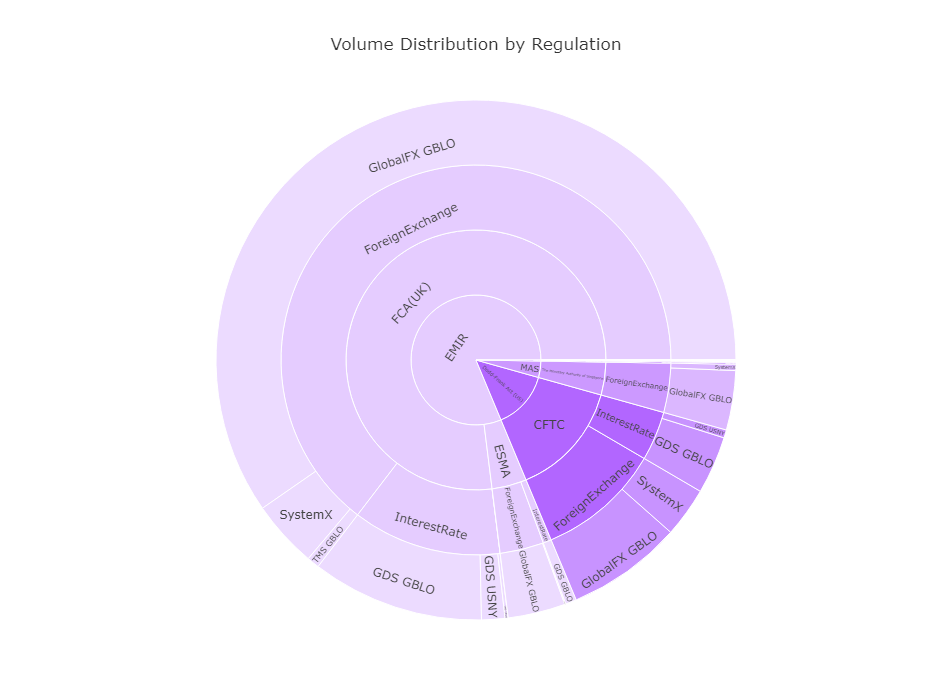

In [139]:
label = []
parent = []
value = []
text = []
hoverinfo = []
color = []
# color_pallete = ['#ff9999', '#E5CCFF', '#CCFFCC','#D6DBDF', '#FFCCCC', '#A2D9CE', '#FFE5CC', '#CCE5FF', '#E0E0E0', '#CCFFE5']
color_pallete = ['#E5CCFF', '#CC99FF', '#B266FF','#9933FF', '#7F00FF', '#6600CC','#4C0099']
color_dict = {}

for i in range(0,len(list(dff['subjectIdentifier.regulatoryRegimeIdentifier.name'].unique()))):
    color_dict[list(dff['subjectIdentifier.regulatoryRegimeIdentifier.name'].unique())[i]] = color_pallete[i%(len(color_pallete))]

for i in list(dff['subjectIdentifier.regulatoryRegimeIdentifier.name'].unique()):
    label.append(i)
    text.append(i)
    parent.append('')
    val = dff[dff['subjectIdentifier.regulatoryRegimeIdentifier.name']==i].shape[0]
    value.append(val)
    color.append(color_dict[i])
    hoverinfo.append('Regime Name: ' + i + '<br>' + 'Count: ' + str(val))

for i in list(dff['subjectIdentifier.regulatoryRegimeIdentifier.name'].unique()):
    for j in list(dff[dff['subjectIdentifier.regulatoryRegimeIdentifier.name']==i]['subjectIdentifier.regulatoryRegimeIdentifier.regulatoryAuthority'].unique()):
        label.append(i + '/' + j)
        text.append(j)
        parent.append(i)
        color.append(color_dict[i])
        val = dff[(dff['subjectIdentifier.regulatoryRegimeIdentifier.name']==i) & (dff['subjectIdentifier.regulatoryRegimeIdentifier.regulatoryAuthority']==j)].shape[0]
        value.append(val)
        hoverinfo.append('Regime Name: ' + i + '<br>' + 
                         'Regulatory Authority: ' + j + '<br>' +
                         'Count: ' + str(val))

for i in list(dff['subjectIdentifier.regulatoryRegimeIdentifier.name'].unique()):
    for j in list(dff[dff['subjectIdentifier.regulatoryRegimeIdentifier.name']==i]['subjectIdentifier.regulatoryRegimeIdentifier.regulatoryAuthority'].unique()):
        for k in list(dff[(dff['subjectIdentifier.regulatoryRegimeIdentifier.regulatoryAuthority']==j) & (dff['subjectIdentifier.regulatoryRegimeIdentifier.name']==i)]['reportableData.assetClass'].unique()):
            label.append(i + '/' + j + '/' + k)
            text.append(k.replace(j+':',''))
            color.append(color_dict[i])
            parent.append(i + '/' + j)
            val = dff[(dff['subjectIdentifier.regulatoryRegimeIdentifier.regulatoryAuthority']==j) & (dff['subjectIdentifier.regulatoryRegimeIdentifier.name']==i) & (dff['reportableData.assetClass']==k)].shape[0]
            value.append(val)
            hoverinfo.append('Regime Name: ' + i + '<br>' + 
                             'Regulatory Authority: ' + j + '<br>' +
                             'Asset Class: ' + k + '<br>' +
                             'Count: ' + str(val))

for i in list(dff['subjectIdentifier.regulatoryRegimeIdentifier.name'].unique()):
    for j in list(dff[dff['subjectIdentifier.regulatoryRegimeIdentifier.name']==i]['subjectIdentifier.regulatoryRegimeIdentifier.regulatoryAuthority'].unique()):
        for k in list(dff[(dff['subjectIdentifier.regulatoryRegimeIdentifier.regulatoryAuthority']==j) & (dff['subjectIdentifier.regulatoryRegimeIdentifier.name']==i)]['reportableData.assetClass'].unique()):
            for l in list(dff[(dff['subjectIdentifier.regulatoryRegimeIdentifier.regulatoryAuthority']==j) & (dff['subjectIdentifier.regulatoryRegimeIdentifier.name']==i) & (dff['reportableData.assetClass']==k)]['subjectIdentifier.sourceSystem'].unique()):
                label.append(i + '/' + j + '/' + k + '/' + l)
                text.append(l)
                color.append(color_dict[i])
                parent.append(i + '/' + j + '/' + k)
                val = dff[(dff['subjectIdentifier.regulatoryRegimeIdentifier.regulatoryAuthority']==j) & (dff['subjectIdentifier.regulatoryRegimeIdentifier.name']==i) & (dff['reportableData.assetClass']==k) & (dff['subjectIdentifier.sourceSystem']==l)].shape[0]
                value.append(val)
                hoverinfo.append('Regime Name: ' + i + '<br>' + 
                             'Regulatory Authority: ' + j + '<br>' +
                             'Asset Class: ' + k + '<br>' +
                             'Source System: ' + l + '<br>' +
                             'Count: ' + str(val))

trace1 = go.Sunburst(
        text= text,
        labels = label,
        parents=parent,
        values = value,
        hovertext=hoverinfo,
        marker = dict(colors = color),
        # marker = dict(colors = ['red','yellow','green','blue','light blue','orange','purple','pink','grey','black']),
        hoverinfo="text",
        textinfo="text",
        branchvalues='total',
    )

fig = go.Figure(data = [trace1])

# fig.add_annotation(
#     x = 0,
#     y = 1.1,
#     text = "Actions Performed by Users in the one month period<br>Count of users: ",
#     showarrow =False,
#     font = dict(size=14, color='blue'),
# )

fig.update_layout(
    title='Volume Distribution by Regulation',
    template="ggplot2",
)

plotly.offline.plot(fig, filename = 'Volume Distribution by Regulation.html',auto_open=False)

fig.update_layout(
    height = 700,
)

fig.show()

In [140]:
# fig1 = px.sunburst(dff, path=['subjectIdentifier.regulatoryRegimeIdentifier.name','subjectIdentifier.regulatoryRegimeIdentifier.regulatoryAuthority','reportableData.assetClass','subjectIdentifier.sourceSystem'],)
# # fig1.update_layout(height=480,#margin={"r":0,"t":0,"l":0,"b":0},
# #                   title='heading',
# #         template="ggplot2",
# #                   )
# # fig1.add_annotation(
# #     x = 0,
# #     y = 1.1,
# #     text = "Actions Performed by Users in the one month period<br>Count of users: ",
# #     showarrow =False,
# #     font = dict(size=14, color='blue'),
# # )
# colorlist = ['#E5CCFF', '#CC99FF', '#B266FF','#9933FF', '#7F00FF', '#6600CC','#4C0099','#E5CCFF', '#CC99FF', '#B266FF','#9933FF', '#7F00FF', '#6600CC','#4C0099','#E5CCFF', '#CC99FF', '#B266FF','#9933FF', '#7F00FF', '#6600CC','#4C0099']
# color_info = []
# for i in range(0,dff['subjectIdentifier.regulatoryRegimeIdentifier.name'].shape[0]):
#     color_info.append(colorlist[i%len(colorlist)])
# fig1.update_traces(marker = dict(colors =color_info ))

# fig1.update_layout(#height=480,margin={"r":0,"t":0,"l":0,"b":0},
#                   title='Volume Distribution by Regulation',
#         template="ggplot2",
#                   )
# plotly.offline.plot(fig1, filename = 'Volume Distribution by Regulation.html',auto_open=False)
# fig1.update_layout(height=700
#                   )
# fig1.show()

In [141]:
# dff_highest_version = dff.sort_values(by=['transactionId','version'], ascending = [True,False]).drop_duplicates(subset='transactionId',keep='first')
dff_highest_version = dff.sort_values(by=['subjectIdentifier.transactionId','subjectIdentifier.version'], ascending = [True,False]).drop_duplicates(subset='subjectIdentifier.transactionId',keep='first')


#dff_highest_version.head()

In [142]:
#dff_highest_version.shape

In [143]:
# dff_highest_version[dff_highest_version['reportableData.leg1NotionalCurrency'].isna()].shape#.value_counts()
# dff_highest_version.shape
dff_highest_version = dff_highest_version[dff_highest_version['reportableData.leg1NotionalCurrency'].notna()]
# dff = dff[dff['reportableData.leg1NotionalAmount'].notna()]

In [144]:
dff_temp = dff_highest_version[(dff_highest_version['nonReportableData.tradeParty2Name'].str.contains('NWM', case=False)==False) & (dff_highest_version['nonReportableData.tradeParty2Name'].str.contains('RBS', case=False)==False) & (dff_highest_version['nonReportableData.tradeParty2Name'].str.contains('NATWEST', case=False)==False)]

In [145]:
#dff_temp.shape

In [146]:
conversion_rate = {'AED': '4.5176',
 'ALL': '132.4952',
 'ANG': '2.2187',
 'ARS': '230.2217',
 'AUD': '1.7457',
 'AWG': '2.2195',
 'BBD': '2.4623',
 'BDT': '131.4202',
 'BGN': '2.22',
 'BHD': '0.4641',
 'BIF': '2553.7512',
 'BMD': '1.2312',
 'BND': '1.6216',
 'BOB': '8.5071',
 'BRL': '6.2465',
 'BSD': '1.2312',
 'BTN': '100.9508',
 'BZD': '2.4816',
 'CAD': '1.6377',
 'CHF': '1.1281',
 'CLP': '977.11',
 'CNY': '8.316',
 'COP': '5715.849',
 'CRC': '679.9871',
 'CZK': '26.9584',
 'DKK': '8.4317',
 'DOP': '69.8178',
 'DZD': '167.3483',
 'EGP': '37.1581',
 'ETB': '66.0636',
 'EUR': '1.1334',
 'FJD': '2.6609',
 'GMD': '76.0856',
 'GNF': '10599.944',
 'GTQ': '9.6641',
 'HKD': '9.6506',
 'HNL': '30.3557',
 'HRK': '8.5403',
 'HTG': '184.0546',
 'HUF': '443.451',
 'IDR': '18469.7806',
 'ILS': '4.2525',
 'INR': '100.6704',
 'IQD': '1796.8187',
 'IRR': '51961.0511',
 'ISK': '173.778',
 'JMD': '189.3992',
 'JOD': '0.8734',
 'JPY': '160.1872',
 'KES': '153.2381',
 'KMF': '558.1455',
 'KRW': '1517.3918',
 'KWD': '0.3758',
 'KYD': '1.0259',
 'KZT': '567.0088',
 'LBP': '1861.4718',
 'LKR': '452.4304',
 'LSL': '21.4658',
 'MAD': '12.5701',
 'MDL': '23.0695',
 'MKD': '69.8337',
 'MNT': '4194.5148',
 'MOP': '9.9384',
 'MUR': '54.4159',
 'MVR': '18.9106',
 'MWK': '1264.507',
 'MXN': '23.1981',
 'MYR': '5.2466',
 'NAD': '21.1882',
 'NGN': '566.2107',
 'NIO': '44.986',
 'NOK': '12.2902',
 'NPR': '161.5209',
 'NZD': '1.9121',
 'OMR': '0.474',
 'PAB': '1.2312',
 'PEN': '4.7354',
 'PGK': '4.3389',
 'PHP': '67.3444',
 'PKR': '329.9167',
 'PLN': '5.3372',
 'PYG': '9092.6167',
 'QAR': '4.5138',
 'RON': '5.577',
 'RUB': '86.9013',
 'RWF': '1330.3466',
 'SAR': '4.6208',
 'SBD': '10.1133',
 'SCR': '16.1969',
 'SEK': '12.8553',
 'SGD': '1.6178',
 'SLL': '21748.4177',
 'SVC': '10.773',
 'SZL': '21.4659',
 'THB': '40.4559',
 'TND': '3.755',
 'TOP': '2.8491',
 'TRY': '23.1575',
 'TTD': '8.3631',
 'TWD': '37.016',
 'TZS': '2871.062',
 'UAH': '45.2368',
 'UGX': '4540.4113',
 'USD': '1.2309',
 'UYU': '47.6367',
 'VUV': '145.3309',
 'WST': '3.3211',
 'XAF': '743.5455',
 'XCD': '3.3273',
 'XOF': '743.5455',
 'XPF': '135.2658',
 'YER': '308.2821',
 'ZAR': '21.4444',
    'GBP':'1',
    'XAU':'1'} 

# def converttogbp(x):
#     return float(x.reportableData.leg1NotionalAmount)# * int(conversion_rate[x['reportableData.leg1NotionalCurrency']])

In [147]:
dff_temp['Count']=1
dff_temp_grp = dff_temp.groupby(['nonReportableData.tradeParty2Name','reportableData.assetClass','reportableData.productId','reportableData.leg1NotionalCurrency']).agg({'reportableData.leg1NotionalAmount':sum, 'Count': sum}).reset_index()
dff_temp_grp['reportableData.leg1NotionalAmount'] = dff_temp_grp['reportableData.leg1NotionalAmount'].astype('int64')
dff_temp_grp['GBP_EQUIVALENT']=1
for i in range(0,dff_temp_grp.shape[0]):
    dff_temp_grp.loc[i,'GBP_EQUIVALENT'] = float(float(dff_temp_grp.loc[i,'reportableData.leg1NotionalAmount']) / float(conversion_rate[dff_temp_grp.loc[i,'reportableData.leg1NotionalCurrency']]))
    dff_temp_grp.loc[i,'GBP_EQUIVALENT'] = int(dff_temp_grp.loc[i,'GBP_EQUIVALENT'].round(0))
#dff_temp_grp

C:\dev\.conda\envs\ds_intern\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [148]:
non_clearing_houses = (dff_temp_grp['nonReportableData.tradeParty2Name'].str.contains('LCH', case=False)==False) & (dff_temp_grp['nonReportableData.tradeParty2Name'].str.contains('EUREX', case=False)==False) & (dff_temp_grp['nonReportableData.tradeParty2Name'].str.contains('CLEAR STREAM', case=False)==False) & (dff_temp_grp['nonReportableData.tradeParty2Name'].str.contains('CLEARSTREAM', case=False)==False) & (dff_temp_grp['nonReportableData.tradeParty2Name'].str.contains('ICE LINK', case=False)==False) & (dff_temp_grp['nonReportableData.tradeParty2Name'].str.contains('ICELINK', case=False)==False)
dff_non_clearing = dff_temp_grp[non_clearing_houses]
dff_clearing = dff_temp_grp[~non_clearing_houses]
# dff_temp_grp.groupby('nonReportableData.tradeParty2Name').agg({'Count':'sum'}).reset_index().sort_values(by='Count',ascending = False)

## Business Data View

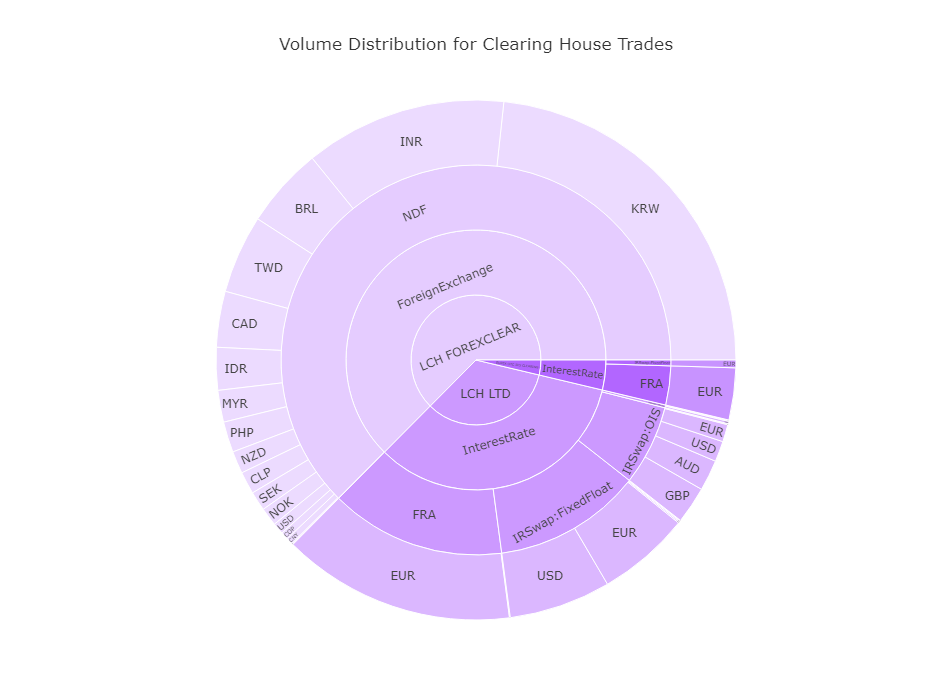

In [149]:
dff_temp_sunburst = pd.DataFrame()

for i in list(dff_clearing.groupby('nonReportableData.tradeParty2Name').agg({'Count':'sum'}).reset_index().sort_values(by='Count',ascending = False).head(10)['nonReportableData.tradeParty2Name']):
    dff_temp_sunburst = dff_temp_sunburst.append(dff_clearing[dff_clearing['nonReportableData.tradeParty2Name']==i].sort_values(by='Count',ascending = False),ignore_index=True)

fig1 = makesunburst(dff_temp_sunburst,"Volume Distribution for Clearing House Trades",'Volume Distribution for Clearing House Trades.html',1)
# plotly.offline.plot(fig1, filename = ,auto_open=False)
fig1.show()
#dff_temp_sunburst.head()

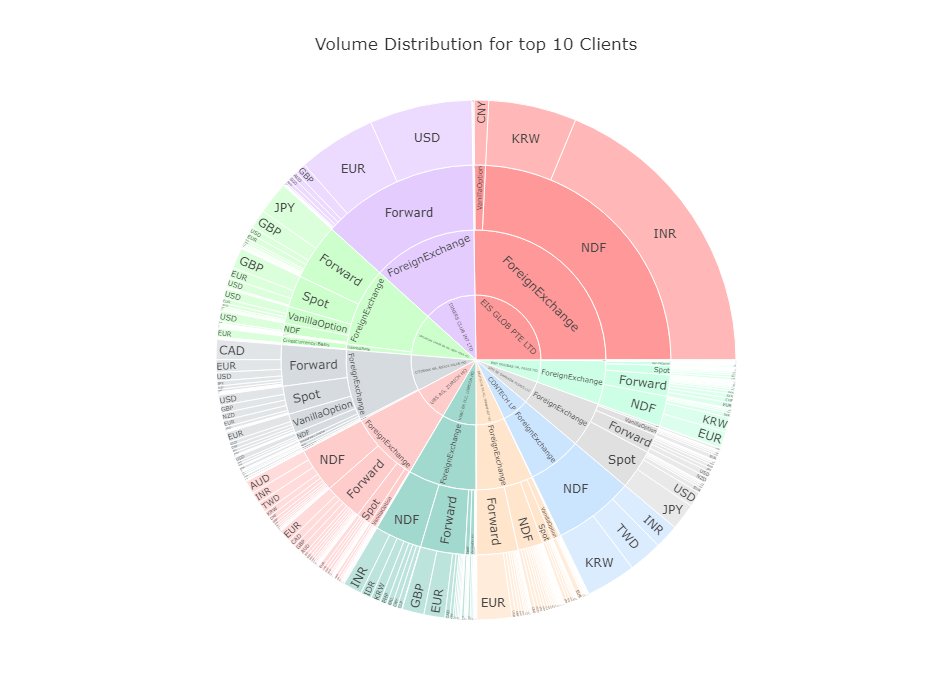

In [150]:
dff_temp_sunburst = pd.DataFrame()

for i in list(dff_non_clearing.groupby('nonReportableData.tradeParty2Name').agg({'Count':'sum'}).reset_index().sort_values(by='Count',ascending = False).head(10)['nonReportableData.tradeParty2Name']):
    dff_temp_sunburst = dff_temp_sunburst.append(dff_non_clearing[dff_non_clearing['nonReportableData.tradeParty2Name']==i].sort_values(by='Count',ascending = False),ignore_index=True)

fig2 = makesunburst(dff_temp_sunburst,'Volume Distribution for top 10 Clients','Volume Distribution for top 10 Clients.html',0)
fig2.show()
#dff_temp_sunburst.head()

In [151]:
dff.rename(columns = {'regulatoryRegimeIdentifier.name':'regimename','regulatoryRegimeIdentifier.regulatoryAuthority':'regulatoryAuthority'},inplace = True)

In [152]:
dff_c = pd.DataFrame({'iso_alpha':list(dff['reportableData.tradeParty2CountryOfOtherCpty'].value_counts()[:15].index),
                     'custom_data':list(dff['reportableData.tradeParty2CountryOfOtherCpty'].value_counts()[:15].values)})

In [153]:
dff_c['country_alpha_3'] = dff_c.iso_alpha.apply(lambda x: country_name_to_country_alpha3(country_alpha2_to_country_name(x)))

In [154]:
dff_c['Country_name'] = dff_c.country_alpha_3.apply(lambda x: coco.convert(names=x, to='name_short', not_found=None))


In [155]:
dff_c.rename(columns= {'custom_data':'TRADE_VOLUME','Country_name':'COUNTRY','country_alpha_3':'COUNTRY_ISO_CODE'},inplace = True)

In [156]:
dff_c['DAILY_AVG_VOLUME'] = (dff_c.TRADE_VOLUME/22).round()

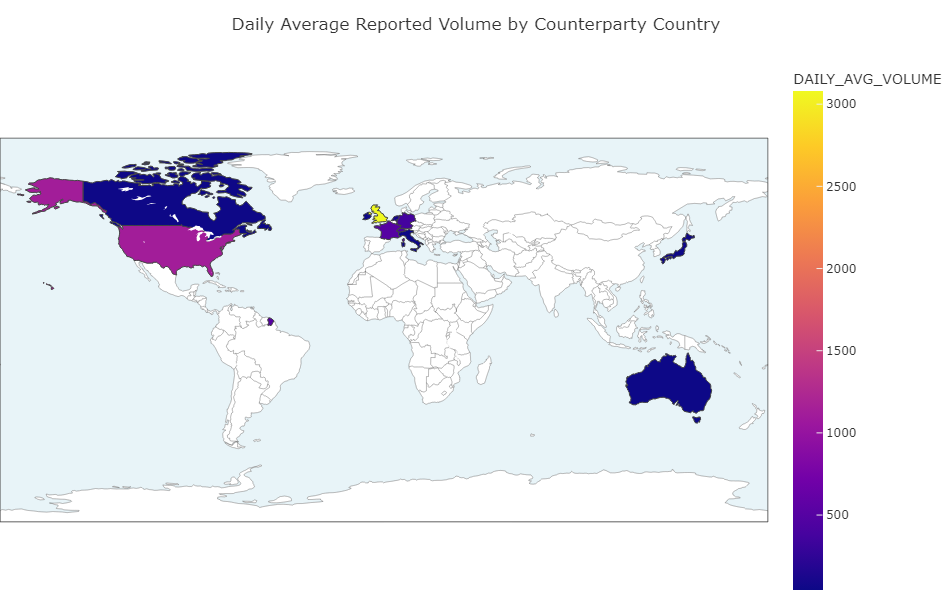

In [157]:
fig = px.choropleth(dff_c, locations="COUNTRY_ISO_CODE",color_discrete_map=None,
                    color = 'DAILY_AVG_VOLUME', # lifeExp is a column of gapminder
                    hover_name = 'COUNTRY', # column to add to hover information
                    #range_color=(0, 103302),
                    color_continuous_scale=px.colors.sequential.Plasma
                   )
# fig.add_annotation(
#     x = 0,
#     y = 0,
#     text = "Actions Performed by Users in the one month period<br>Count of users: ",
#     showarrow =False,
#     font = dict(size=14, color='blue'),
# )

fig.update_layout(geo=dict(showocean =True,showcountries =True,landcolor = 'white',oceancolor = '#e8f4f8',countrywidth = 0.2,coastlinewidth = 0.2),margin={"r":0,"l":0,"b":0},
                 title="Daily Average Reported Volume by Counterparty Country",
        template="ggplot2",)

plotly.offline.plot(fig, filename = 'Daily Average Reported Volume by Counterparty Country.html',auto_open=False)

fig.update_layout(height=600)

fig.show()

In [158]:
# with open('p_graph.html', 'a') as f:
#     f.write(fig1.to_html(full_html=False, include_plotlyjs='cdn'))
#     f.write(fig2.to_html(full_html=False, include_plotlyjs='cdn'))
#     # f.write(fig3.to_html(full_html=False, include_plotlyjs='cdn'))